In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from prettytable import PrettyTable
from sklearn.decomposition import KernelPCA as kpca
from sklearn.metrics import roc_curve, auc,roc_auc_score,f1_score,confusion_matrix
import numpy as np
print (__doc__)

Automatically created module for IPython interactive environment


### Loading Data

In [8]:
filename="../preprocessed/amlodipine.csv"
f = open(filename)
f.readline()  # skip the header
data =  np.loadtxt(fname = f, delimiter = ',',dtype='double')
Y = data[:,0]
X = data[:, 1:data.shape[1]] 

# Reading the labels now
f= open(filename)
labels_=np.loadtxt(fname=f,delimiter=',',dtype='string')
labels_=labels_[0,1:]

** Reading File into Numpy Array **
print 'X: ',X
print 'Y: ',Y

*Normalizing to Zero Mean Unit Variance*

In [11]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

In [12]:
print 'Labels selected are: ',labels_ 

Labels selected are:  ['Gender' 'Age_yrs' 'Height_cm' 'Weight_Kgs' 'BMI' 'DM' 'Family_HisCAD'
 'Hyperlipidaemia' 'Smoking status' 'Dose Mg' 'Albumin' 'Globulin'
 'Total Proteins' 'Proteinuria_24Hrs' 'Urinary sodium' 'Plasma creatinine'
 'Plasma sodium' 'Urinary creatinine' 'Fractional_Na' 'osmolality'
 'SBP_3avg' 'DBP_3avg' 'PR_3avg' 'QTinterval_ms' 'QTc' 'VMA' 'LVEF' 'IVC'
 'Mobility' 'Self Care ' 'Usual Activity' 'Pain and Discomfort '
 'Anxiety and depression ' 'VAS' 'Plasma renin ' 'Vasopressin ']


**POST Normalization, we Have:**

In [13]:
# Post Normalization
print 'Normalization gives: ',X

Normalization gives:  [[ 0.9  -0.08  0.01 ...,  0.19 -0.59 -0.12]
 [ 0.9   0.75 -0.39 ..., -0.13 -0.61  0.09]
 [ 0.9  -0.4  -0.79 ...,  0.19 -0.58 -0.43]
 ..., 
 [ 0.9   0.75 -0.39 ..., -1.07  4.16 -0.42]
 [ 0.9  -0.4  -0.79 ..., -1.38  0.59  0.42]
 [-1.11  1.28 -0.49 ..., -1.15  3.31  0.31]]


### Principal Component Analysis of Dataset

The variance contributed by each PC by order is:  [ 0.16  0.08  0.07]
MLE Method Parameters Chosen:  3


D:\Anaconda3\envs\dato-env\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


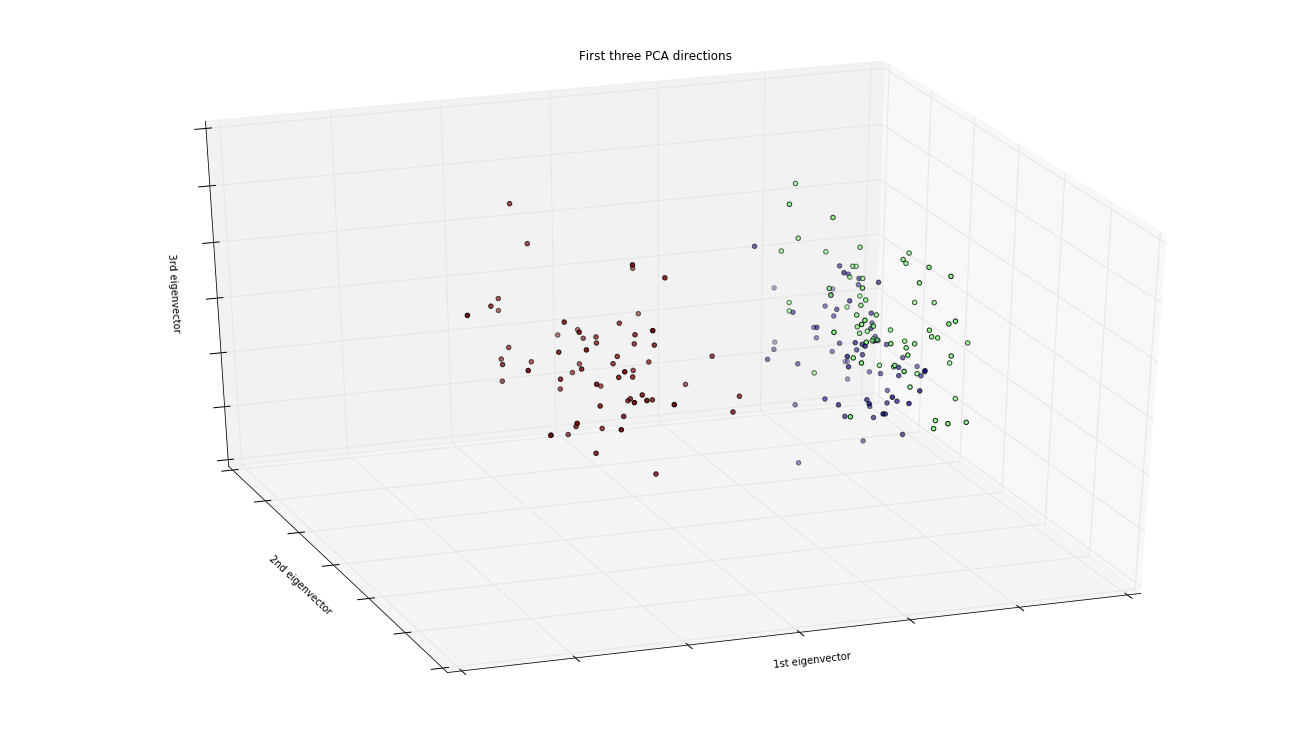

In [14]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(18, 10))
ax = Axes3D(fig, elev=-150, azim=110)
# Replace mle with any number of components desired for analysis

PCA_var = PCA(n_components=3)
X_reduced =PCA_var.fit_transform(X)
print 'The variance contributed by each PC by order is: ',PCA_var.explained_variance_ratio_
print 'MLE Method Parameters Chosen: ',PCA_var.n_components_
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y)
# for Default colormap: Class 0: Blue Class 1: Green Class 2: Red
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
ax.legend(loc="lower right")
plt.show()

### Using varying kernels allows for Non-linear manifold representations

## Kernel PCA

**It's clear from the representation below, that the dataset forms three distinct clusters, that can be segregated using a high-dimensional non-linear classifier**

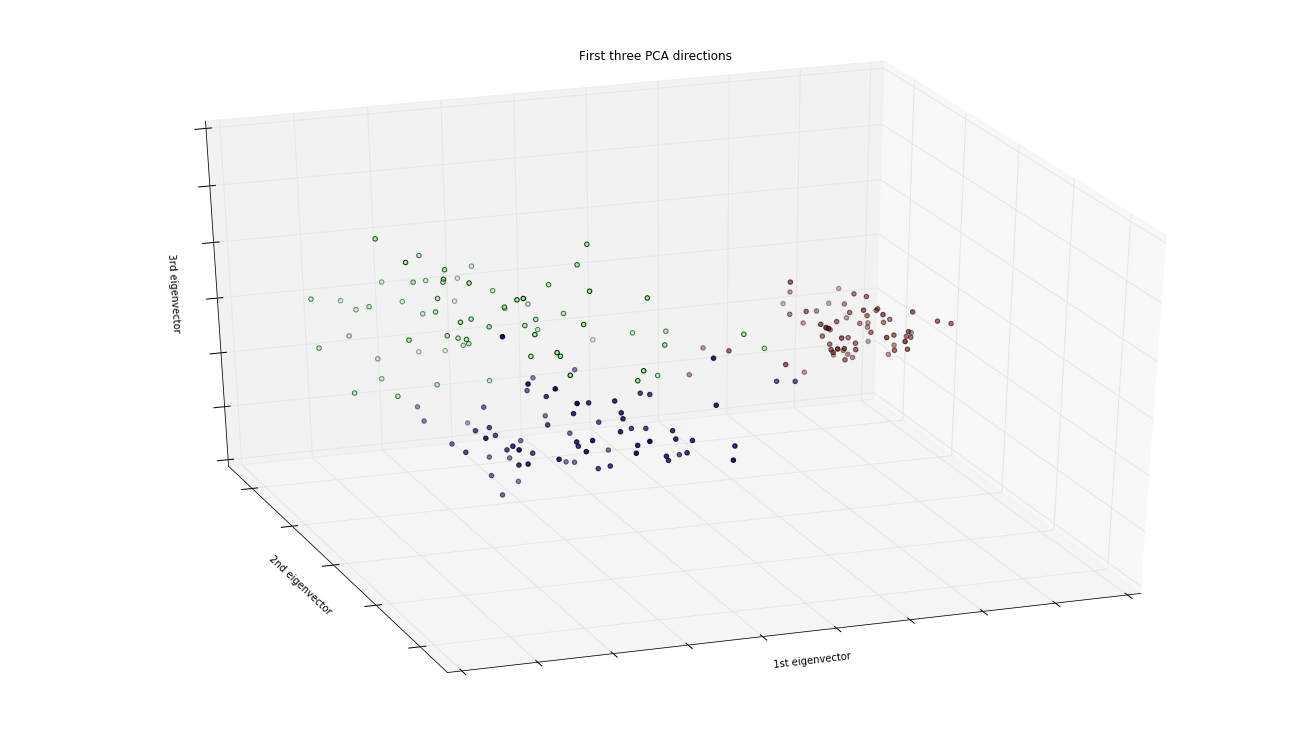

In [15]:
fig = plt.figure(1, figsize=(18, 10))
ax = Axes3D(fig, elev=-150, azim=110)
PCA_var= kpca(n_components=14,kernel='rbf')
X_reduced =PCA_var.fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

**......**

# Classification

### Defining Confusion Matrix Function

In [5]:
class_labels_=np.array(['Group 1','Group 2','Group 3'])
def plot_confusion_matrix(cm,name,title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_labels_))
    plt.xticks(tick_marks,class_labels_, rotation=45)
    plt.yticks(tick_marks,class_labels_)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**TRAINING MODELS BELOW: **

Classifier:  Nearest Neighbors  Accuracy:  0.91935483871


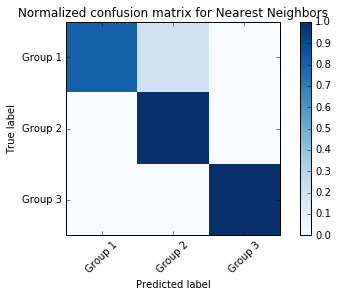

Classifier:  RBF SVM  Accuracy:  0.983870967742


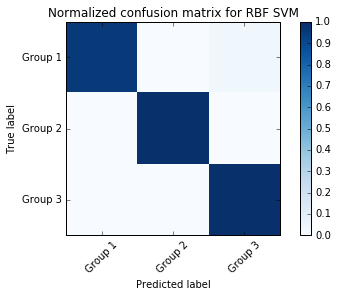

Classifier:  Decision Tree  Accuracy:  0.983870967742


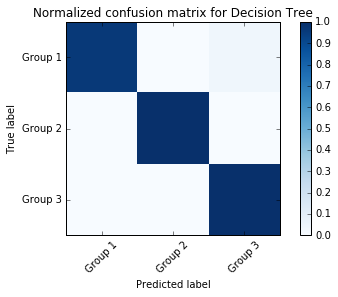

Classifier:  Random Forest  Accuracy:  1.0


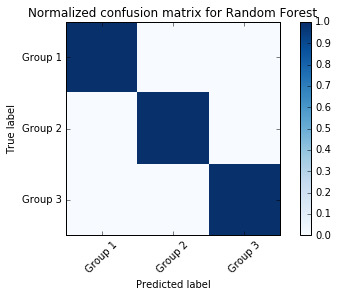

Classifier:  Naive Bayes  Accuracy:  0.983870967742


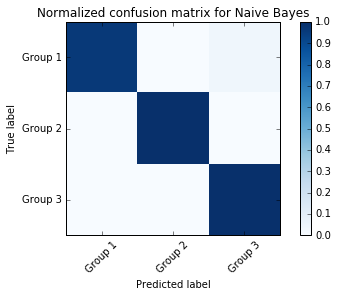

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

f = open(filename)
f.readline()  # skip the header
data =  np.loadtxt(fname = f, delimiter = ',',dtype='double')
Y = data[:,0]
X = data[:, 1:data.shape[1]]  # we only take the first two features.
names = ["Nearest Neighbors", "RBF SVM", "Decision Tree",
         "Random Forest", "Naive Bayes"]
classifiers = [
    KNeighborsClassifier(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()]


#Normalizing to Zero Mean Unit variance

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std


# preprocess dataset, split into training and test part
# standardize

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3)

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_predic=clf.predict(X_test)
    print 'Classifier: ',name,' Accuracy: ',score
    cm=confusion_matrix(y_test,y_predic)
    np.set_printoptions(precision=2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_normalized,name,title='Normalized confusion matrix for '+name)
    plt.show()
